In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load the dataset

In [41]:
data=pd.read_csv('datasets/winequality-white.csv')

In [42]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Pre-processing

In [43]:
X=data.drop('quality',axis=1)
y=data['quality']

X_train,X_valid,y_train,y_valid=train_test_split(X,y,train_size=0.7,random_state=17)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_valid_scaled=scaler.transform(X_valid)

## Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)

LinearRegression()

Question 1: What are mean squared errors of model predictions on train and holdout sets?



In [45]:
from sklearn.metrics import mean_squared_error

train_pred=linreg.predict(X_train_scaled)
mean_squared_error(train_pred,y_train)

0.5580606489803572

In [46]:
valid_pred=linreg.predict(X_valid_scaled)
mean_squared_error(valid_pred,y_valid)

0.5842473102404545

Question 2: Which feature this linear regression model treats as the most influential on wine quality?



<Axes: >

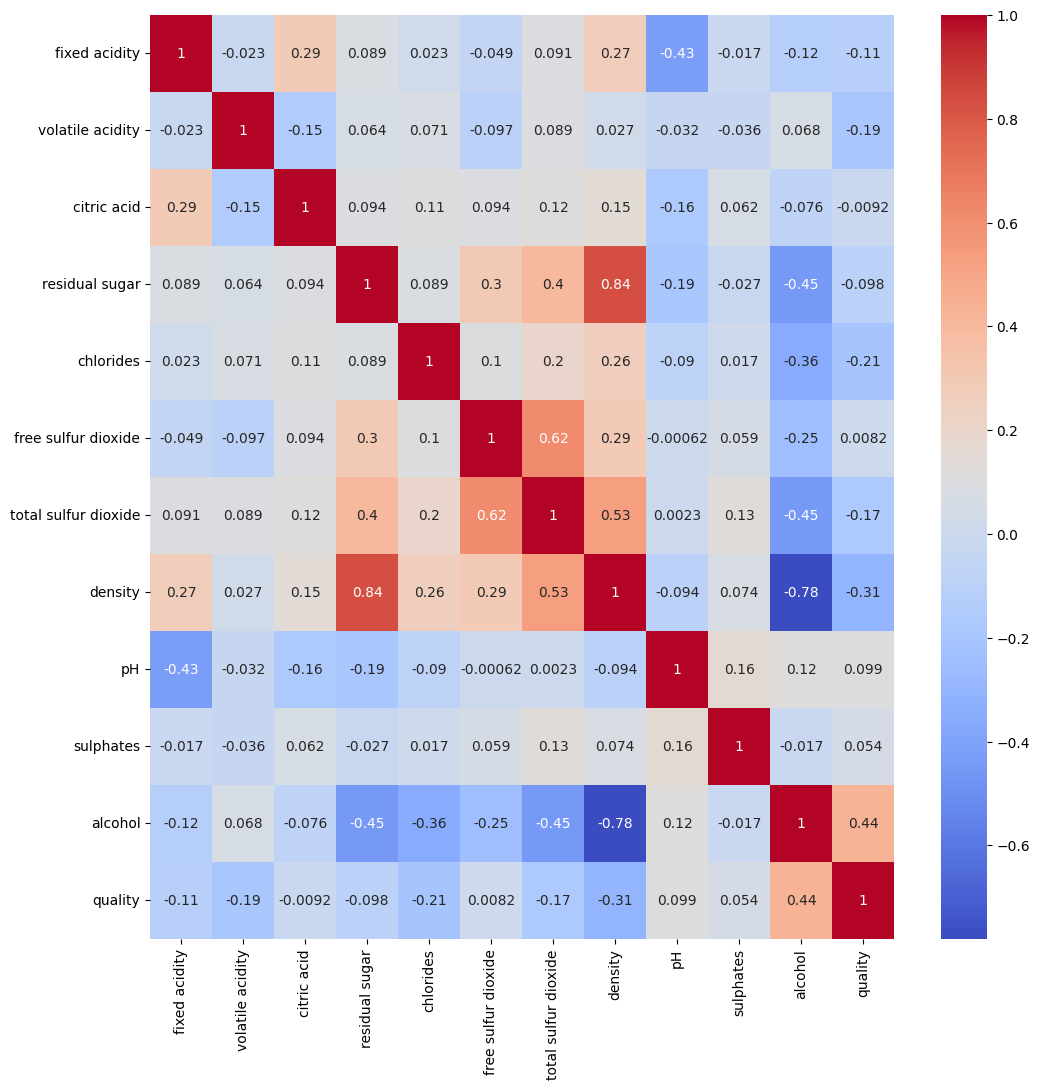

In [47]:
wine_corr=data.corr()

plt.figure(figsize=(12,12))
sns.heatmap(data=wine_corr,cmap='coolwarm',annot=True)


Alcohol is the most influential

## Lasso regression

In [48]:
from sklearn.linear_model import Lasso

In [49]:
lasreg=Lasso(alpha=0.01)
lasreg.fit(X_train_scaled,y_train)

Lasso(alpha=0.01)

Which feature is the least informative in predicting wine quality, according to this LASSO model?



In [50]:
lasreg_coef = pd.DataFrame(
    {"coef": lasreg.coef_, "coef_abs": np.abs(lasreg.coef_)},
    index=data.columns.drop("quality"),
)
lasreg_coef.sort_values(by="coef_abs", ascending=False)

,coef,coef_abs
alcohol,0.322425,0.322425
residual sugar,0.256363,0.256363
density,-0.235492,0.235492
volatile acidity,-0.188479,0.188479
pH,0.067277,0.067277
free sulfur dioxide,0.043088,0.043088
sulphates,0.029722,0.029722
chlorides,-0.002747,0.002747
fixed acidity,-0.000000,0.000000
citric acid,-0.000000,0.000000


Train LassoCV with random_state=17 to choose the best value of 


In [51]:
from sklearn.linear_model import LassoCV

alphas=np.logspace(-6,2,200)
lasso_cv=LassoCV(cv=5,alphas=alphas)
lasso_cv.fit(X_train_scaled,y_train)

LassoCV(alphas=array([1.00000000e-06, 1.09698580e-06, 1.20337784e-06, 1.32008840e-06,
       1.44811823e-06, 1.58856513e-06, 1.74263339e-06, 1.91164408e-06,
       2.09704640e-06, 2.30043012e-06, 2.52353917e-06, 2.76828663e-06,
       3.03677112e-06, 3.33129479e-06, 3.65438307e-06, 4.00880633e-06,
       4.39760361e-06, 4.82410870e-06, 5.29197874e-06, 5.80522552e-06,
       6.36824994e-06, 6.98587975e-0...
       1.18953407e+01, 1.30490198e+01, 1.43145894e+01, 1.57029012e+01,
       1.72258597e+01, 1.88965234e+01, 2.07292178e+01, 2.27396575e+01,
       2.49450814e+01, 2.73644000e+01, 3.00183581e+01, 3.29297126e+01,
       3.61234270e+01, 3.96268864e+01, 4.34701316e+01, 4.76861170e+01,
       5.23109931e+01, 5.73844165e+01, 6.29498899e+01, 6.90551352e+01,
       7.57525026e+01, 8.30994195e+01, 9.11588830e+01, 1.00000000e+02]),
        cv=5)

In [52]:
lasso_cv.alpha_

np.float64(0.0002833096101839324)

Question 3: Which feature is the least informative in predicting wine quality, according to the tuned LASSO model?

In [53]:
lastun=Lasso(alpha=0.0002833096101839324)
lastun.fit(X_train_scaled,y_train)

Lasso(alpha=0.0002833096101839324)

In [54]:
lastun_coef = pd.DataFrame(
    {"coef": lastun.coef_, "coef_abs": np.abs(lastun.coef_)},
    index=data.columns.drop("quality"),
)
lastun_coef.sort_values(by="coef_abs", ascending=False)

,coef,coef_abs
density,-0.648161,0.648161
residual sugar,0.526883,0.526883
volatile acidity,-0.192049,0.192049
pH,0.146549,0.146549
alcohol,0.137115,0.137115
fixed acidity,0.093295,0.093295
sulphates,0.060939,0.060939
free sulfur dioxide,0.042698,0.042698
total sulfur dioxide,0.012969,0.012969
chlorides,0.006933,0.006933


Question 4: What are mean squared errors of tuned LASSO predictions on train and holdout sets?



In [55]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_valid,lastun.predict(X_valid_scaled))

0.5832976077860635

## Random Forest

Train a Random Forest with out-of-the-box parameters, setting only random_state to be 17.



In [56]:
from sklearn.ensemble import RandomForestRegressor

randf=RandomForestRegressor(random_state=17)
randf.fit(X_train_scaled,y_train)

RandomForestRegressor(random_state=17)

Question 5: What are mean squared errors of RF model on the training set, in cross-validation (cross_val_score with scoring=’neg_mean_squared_error’ and other arguments left with default values) and on holdout set?

In [57]:
mean_squared_error(randf.predict(X_valid),y_valid)

/home/yogi/workspace/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


0.9510806802721089

In [58]:
from sklearn.model_selection import cross_val_score
np.mean(
        np.abs(
            cross_val_score(
                randf, X_train_scaled, y_train, scoring="neg_mean_squared_error"
            )
))

np.float64(0.4142003732204039)

In [61]:
from sklearn.model_selection import GridSearchCV
forest_params = {'max_depth': list(range(10, 25)),
               'max_features': list(range(6,12))}

grid=GridSearchCV(randf,forest_params,cv=5,n_jobs=-1, verbose=1)
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=17), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                       20, 21, 22, 23, 24],
                         'max_features': [6, 7, 8, 9, 10, 11]},
             verbose=1)

In [62]:
grid.best_params_,grid.best_score_

({'max_depth': 21, 'max_features': 6}, np.float64(0.4939384585901731))

Question 6: What are mean squared errors of tuned RF model in cross-validation (cross_val_score with scoring=’neg_mean_squared_error’ and other arguments left with default values) and on holdout set?

In [63]:
randtun=RandomForestRegressor(max_depth=21,max_features=6,random_state=17)
randtun.fit(X_train_scaled,y_train)
mean_squared_error(randtun.predict(X_valid_scaled),y_valid)


0.36572455603132475